In [1]:
import torch
from torchvision import transforms
from PIL import Image
import torchvision
from dataset import ImagesWithSaliency
from torchvision.io import read_image
import matplotlib.pyplot as plt
import numpy as np

/home/v/mambaforge/envs/saliency/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from model import SalFormer
from transformers import AutoImageProcessor, AutoTokenizer, BertModel, ViTConfig, ViTMAEModel, ViTModel, SwinModel

In [3]:
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224,224)),
    transforms.Lambda(lambda x: x[:3]),
    transforms.Normalize([0.8801, 0.8827, 0.8840], [0.2523, 0.2321, 0.2400]),
    transforms.RandomPerspective()
])

img_transform_no_augment = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224,224)),
    transforms.Lambda(lambda x: x[:3]),
    transforms.Normalize([0.8801, 0.8827, 0.8840], [0.2523, 0.2321, 0.2400])
])

fix_transform = transforms.Compose([
    transforms.Resize((128,128))
])
hm_transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.Lambda(lambda x: x/255)
])
device = 'cuda'

In [4]:
vit = SwinModel.from_pretrained("microsoft/swin-tiny-patch4-window7-224")
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
bert = BertModel.from_pretrained("bert-base-uncased")
model = SalFormer(vit, bert).to(device)

In [11]:
checkpoint = torch.load('./model_wo_cross.tar')

In [ ]:
for l in checkpoint['model_state_dict']:
    print(l)

: 

In [3]:
checkpoint['epoch']

528

In [ ]:
checkpoint = torch.load('./model_lr6e-5_wd1e-4.tar')
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

In [30]:
img = Image.open("./SalChartQA/val/raw_img/multi_col_60004.png").convert("RGB")
# fixation0 = read_image("./SalChartQA/test/saliency_all/fix_maps/multi_col_60004_Q0.png")
# fixation1 = read_image("./SalChartQA/test/saliency_all/fix_maps/multi_col_60004_Q1.png")
# hm0 = read_image("./SalChartQA/test/saliency_all/heatmaps/multi_col_60004_Q0.png")
# hm1 = read_image("./SalChartQA/test/saliency_all/heatmaps/multi_col_60004_Q1.png")
q0 = "What's the percentage of 65+ age group who trust WHO in regard to a great deal?"
q1 = "What's the median value of \"A fair amount\" bars?"

In [31]:
q0 = "What is the highest percentage in the blue line?"
q1 = "What is the difference between first and last data in black line (somewhat concerned)?"

In [32]:
out = model(img_transform_no_augment(img).unsqueeze(0).to(device) ,  tokenizer(q0, return_tensors="pt", padding=True).to(device))

/home/v/mambaforge/envs/saliency/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [34]:
out = model(img_transform_no_augment(img).unsqueeze(0).to(device) ,  tokenizer(q1, return_tensors="pt", padding=True).to(device))

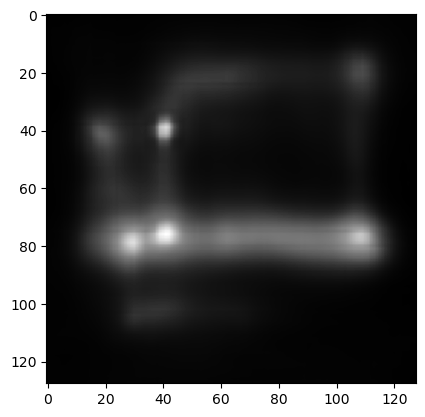

In [33]:
plt.imshow(out[0].permute([1,2,0]).cpu().detach().numpy(), cmap='gray')

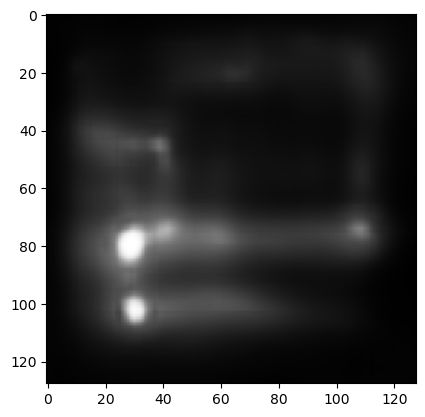

In [35]:
plt.imshow(out[0].permute([1,2,0]).cpu().detach().numpy(), cmap='gray')

In [2]:
fix_transform = transforms.Compose([
    transforms.Resize((128,128))
])
hm_transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.Lambda(lambda x: x/255)
])
dataset = ImagesWithSaliency("./SalChartQA/train/raw_img/", "./SalChartQA/train/saliency_all/fix_maps/", "./SalChartQA/train/saliency_all/heatmaps/", fix_transform, hm_transform)

In [37]:
model = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")

In [45]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

inputs = tokenizer("Hello, my dog dong dog dong ds dsa ds is cute", return_tensors="pt")
outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state

In [64]:
query = torch.rand((1, 13,768))
key = torch.rand((1, 197,768))
value = key

In [38]:
multihead_attn = torch.nn.MultiheadAttention(768, 12, batch_first=True)
attn_output, attn_output_weights = multihead_attn(query, key, value)

In [1]:
from transformers import AutoImageProcessor, ViTMAEModel

/home/v/mambaforge/envs/saliency/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
image_processor = AutoImageProcessor.from_pretrained("facebook/vit-mae-large")
model = ViTMAEModel.from_pretrained("facebook/vit-mae-large")

In [14]:
img = torch.rand((1, 3, 224, 224))

In [15]:
inputs = image_processor(images=img, return_tensors="pt")
outputs = model(**inputs)

In [16]:
outputs['last_hidden_state'].shape

torch.Size([1, 50, 1024])

In [13]:
image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

In [2]:
from urllib.request import urlopen
from PIL import Image
import timm

/home/v/mambaforge/envs/saliency/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
img = Image.open(urlopen(
    'https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/beignets-task-guide.png'
))

In [17]:
model = timm.create_model('xception41p.ra3_in1k', pretrained=True)
model = model.eval()

# get model specific transforms (normalization, resize)
data_config = timm.data.resolve_model_data_config(model)
transforms = timm.data.create_transform(**data_config, is_training=False)

In [18]:
output = model.forward_features(transforms(img).unsqueeze(0))

In [19]:
output.shape

torch.Size([1, 2048, 10, 10])